# Table of Contents
1) [Italy stock of the situation](#section1)<a href='#section1'></a> <br>
- [Mortality Rate](#1a)<a href='#1a'></a> <br>
- [New daily infections](#1b)<a href='#1b'></a> <br>
- [New daily deaths](#1c)<a href='#1c'></a> <br>
- [Recovered patients](#1d)<a href='#1d'></a> <br>

2) [China stock of the situation](#section2)<a href='#section2'></a> <br>
- [Mortality Rate](#2a)<a href='#2a'></a> <br>
- [New daily infections](#2b)<a href='#2b'></a> <br>
- [Total infections](#2c)<a href='#2c'></a> <br>

3) [Handmade Italian Prevision](#section3)<a href='#section3'></a> <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import io
import requests
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure
from utility import *

<a id = 'section1' ></a>
# Italy stock of the situation

In [2]:
df_It      = covid_country('Italy', url_total)
df_It_dead = covid_country('Italy', url_deaths)
df_It_reco = covid_country('Italy', url_recovs)

In [3]:
cases_It = get_cases(df_It)
cases_It_dead = get_cases(df_It_dead)
cases_It_reco = get_cases(df_It_reco)

In [4]:
offset_It = 0

First remove all the zeros from the lists

In [5]:
cases_It = cases_It[30:]
cases_It_reco = cases_It_reco[30:]
cases_It_dead = cases_It_dead[30:]

<a id = '1a' ></a>
## Mortality rate

In [6]:
tax_It = []

for x,y in zip(cases_It,cases_It_dead):
    tax_It.append(float(y)/float(x)*100)

In [7]:
x_It = np.arange(0,len(cases_It))

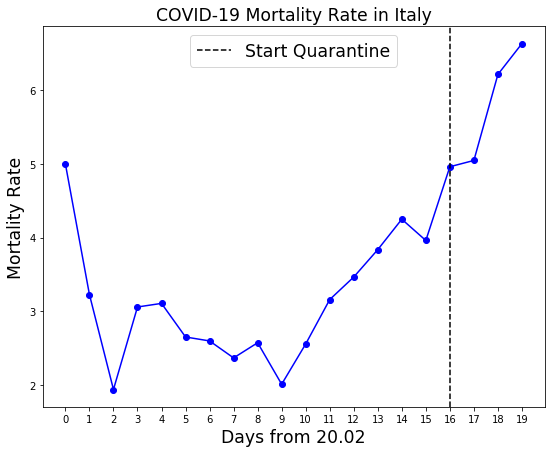

In [8]:
figure(figsize=(9, 7))
plt.title('COVID-19 Mortality Rate in Italy', fontsize='xx-large')
plt.plot(x_It,tax_It,color='blue',marker='o')
plt.xticks(x_It)
plt.ylabel('Mortality Rate', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.axvline(x = 16, color='black',linestyle='dashed',label='Start Quarantine')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()

<a id = '1b' ></a>
## New daily infections

In [9]:
growth_It = []

for i in range (0,len(cases_It)-1):
    growth_It.append(cases_It[i+1]-cases_It[i])

In [10]:
x_It = np.arange(1,len(cases_It))

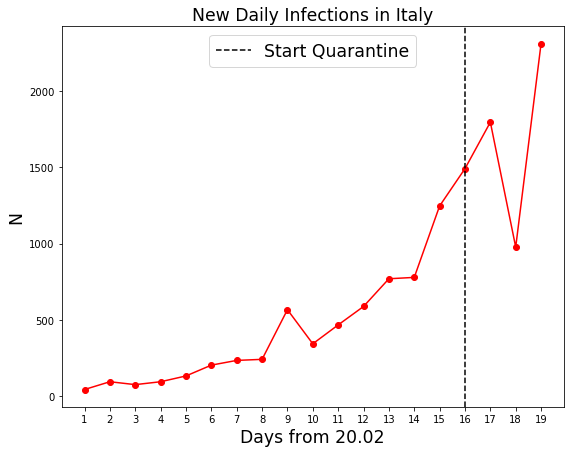

In [11]:
figure(figsize=(9, 7))
plt.title('New Daily Infections in Italy', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xticks(x_It)
plt.plot(x_It,growth_It,color='red',marker='o')
plt.axvline(x = 16, color='black',linestyle='dashed',label='Start Quarantine')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()

<a id = '1c' ></a>
## New daily deaths

In [12]:
growth_It_dead = []

for i in range (0,len(cases_It_dead)-1):
    growth_It_dead.append(cases_It_dead[i+1]-cases_It_dead[i])

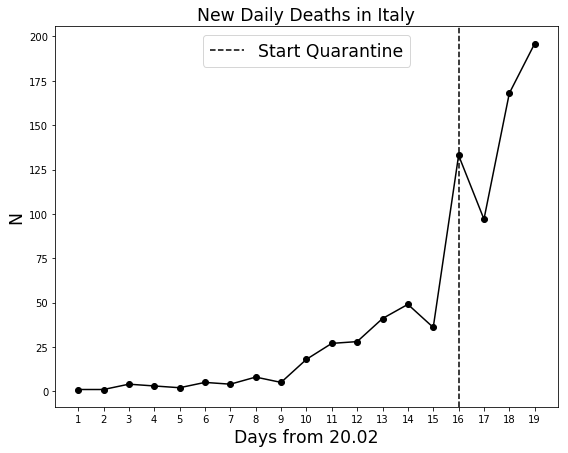

In [13]:
x_It = np.arange(1,len(cases_It_dead))

figure(figsize=(9, 7))
plt.title('New Daily Deaths in Italy', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xticks(x_It)
plt.plot(x_It,growth_It_dead,color='black',marker='o')
plt.axvline(x = 16, color='black',linestyle='dashed',label='Start Quarantine')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()

<a id = '1d' ></a>
## Recovered patients

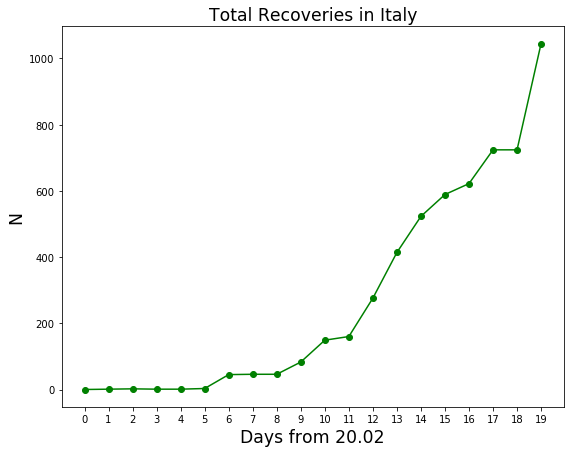

In [14]:
x_It = np.arange(0,len(cases_It_reco))

figure(figsize=(9, 7))
plt.title('Total Recoveries in Italy', fontsize='xx-large')
plt.plot(x_It, cases_It_reco,color='green',marker='o')
plt.ylabel('N', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.xticks(x_It)
plt.show()

In [15]:
growth_It_reco = []

for i in range (0,len(cases_It_reco)-1):
    growth_It_reco.append(cases_It_reco[i+1]-cases_It_reco[i])

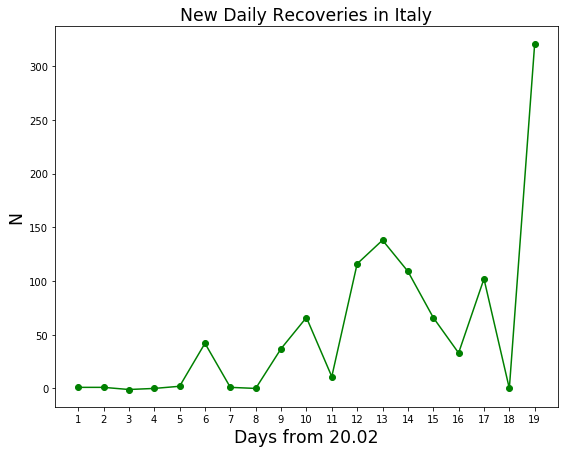

In [16]:
x_It = np.arange(1,len(cases_It_reco))

figure(figsize=(9, 7))
plt.title('New Daily Recoveries in Italy', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xticks(x_It)
plt.plot(x_It,growth_It_reco,color='green',marker='o')
plt.show()

<a id = 'section2' ></a>
# China stock of the situation

In [17]:
df_Ch = covid_country('China', url_total)
df_Ch = df_Ch.sum(numeric_only=True)
cases_Ch = df_Ch[2:].values

df_Ch_dead = covid_country('China', url_deaths)
df_Ch_dead = df_Ch_dead.sum(numeric_only=True)
cases_Ch_dead = df_Ch_dead[2:].values

df_Ch_reco = covid_country('China', url_deaths)
df_Ch_reco = df_Ch_reco.sum(numeric_only=True)
recovs_Ch = df_Ch_reco[2:].values

In [18]:
offset_Ch = 0

<a id = '2a' ></a>
## Mortality rate

In [19]:
tax_Ch = []

for x,y in zip(cases_Ch,cases_Ch_dead):
    tax_Ch.append(float(y)/float(x)*100)

In [20]:
x_Ch = np.arange(0,len(cases_Ch))

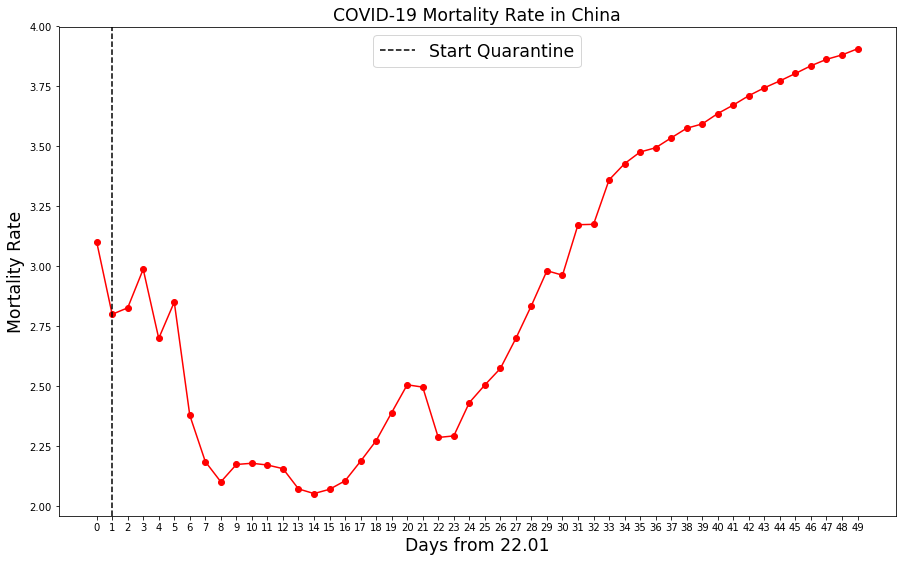

In [21]:
figure(figsize=(15, 9))
plt.title('COVID-19 Mortality Rate in China', fontsize='xx-large')
plt.plot(x_Ch,tax_Ch,color='red',marker='o')
plt.xticks(x_Ch)
plt.ylabel('Mortality Rate', fontsize='xx-large')
plt.xlabel('Days from 22.01', fontsize='xx-large')
plt.axvline(x = 1, color='black',linestyle='dashed',label='Start Quarantine')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()

<a id = '2b' ></a>
## New daily infections

In [22]:
growth_Ch = []

for i in range (0,len(cases_Ch)-1):
    growth_Ch.append(cases_Ch[i+1]-cases_Ch[i])

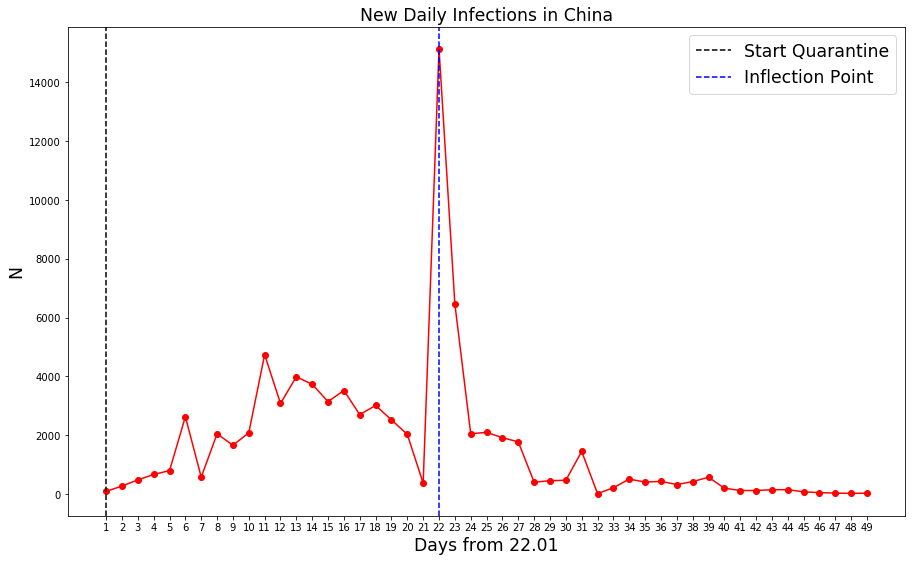

In [23]:
x_Ch = np.arange(1,len(cases_Ch))

figure(figsize=(15, 9))
plt.title('New Daily Infections in China', fontsize='xx-large')
plt.xlabel('Days from 22.01', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xticks(x_Ch)
plt.plot(x_Ch,growth_Ch,color='red',marker='o')
plt.axvline(x = 1, color='black',linestyle='dashed',label='Start Quarantine')
plt.axvline(x = 22, color='blue',linestyle='dashed',label='Inflection Point')
plt.legend(loc='upper right', fontsize='xx-large')
plt.show()

<a id = '2c' ></a>
## Total infections

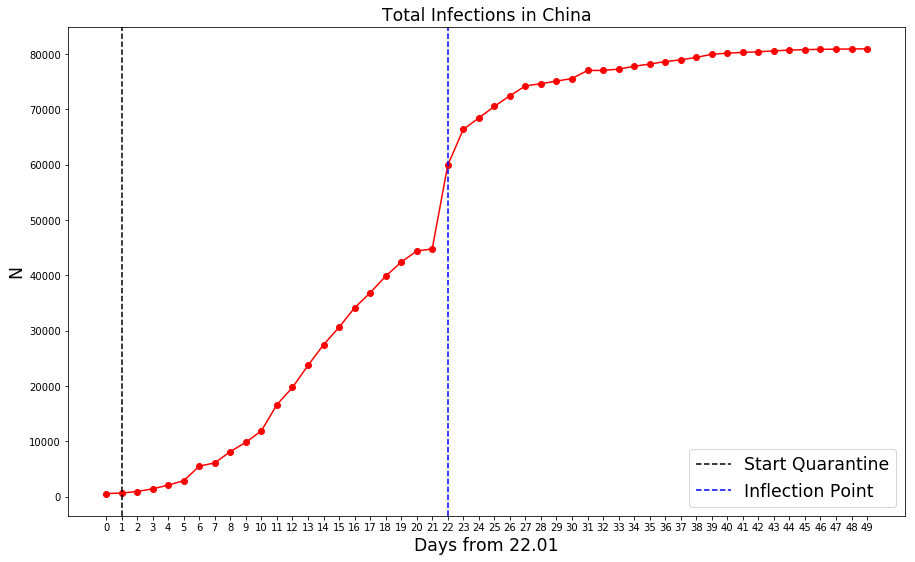

In [24]:
x_Ch = np.arange(0,len(cases_Ch))

figure(figsize=(15, 9))
plt.title('Total Infections in China', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xlabel('Days from 22.01', fontsize='xx-large')
plt.plot(x_Ch,cases_Ch,color='red',marker='o')
plt.xticks(x_Ch)
plt.axvline(x = 1, color='black',linestyle='dashed',label='Start Quarantine')
plt.axvline(x = 22, color='blue',linestyle='dashed',label='Inflection Point')
plt.legend(loc='lower right', fontsize='xx-large')
plt.show()

<a id = 'section3' ></a>
# Handmade Italian Prevision

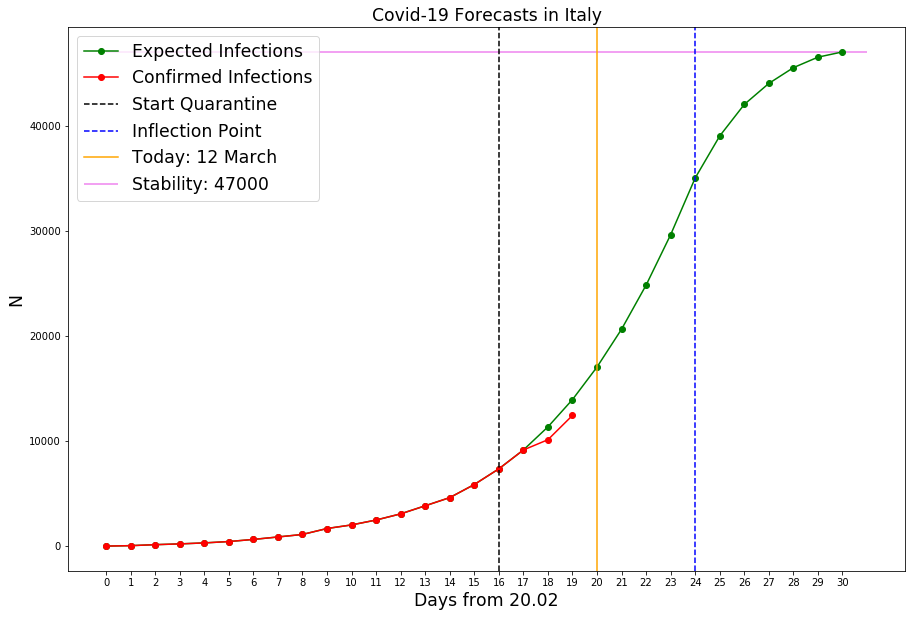

In [25]:
prev_It = np.concatenate((cases_It[:18],11372,13972,17072,20672,24872,29672,35072,39072,42072,44072,45572,46572,47072),axis=None)
x_It = np.arange(0,len(prev_It))

figure(figsize=(15, 10))
plt.title('Covid-19 Forecasts in Italy', fontsize='xx-large')
plt.plot(x_It, prev_It,color='green',marker='o', label='Expected Infections')
plt.plot(cases_It,color='red',marker='o', label='Confirmed Infections')
plt.ylabel('N', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.xticks(x_It)
plt.axvline(x = 16, color='black',linestyle='dashed',label='Start Quarantine')
plt.axvline(x = 24, color='blue',linestyle='dashed',label='Inflection Point')
plt.axvline(x = 20, color='orange',label='Today: 12 March')
plt.hlines(max(prev_It), 0, len(prev_It), colors='violet', label='Stability: 47000')
plt.legend(loc='upper left', fontsize='xx-large')
plt.show()

I estimate an average period in intensive care of 15 days $\Rightarrow$ the people in ICU at the beginning of the quarantine, will get discharged by the beginning of april, when the stability will be reached. So, making a raw estimate, knowing that $\sim10\%$ of the infected ends up in intensive care, by the beginning of april **about 4500 people will be in ICU** because of the Covid-19. Is this a good thing? <br>
Knowing that
- The capacity of the Italian SSN is about 5100 beds in this ward
- On average the occupation due to other deases is about the 60\% (in Lombardy, actually, but I haven't found national estimates)
- The italian government is preparing a plan to increase the number of ICU beds by 50 percent

**We will have 4590 ICU beds** for the people infected by the Covid-19! <br>
According to these estimates, we should be fine by a hair. Finger crossed!

In [26]:
growth_prev_It = []

for i in range (0,len(prev_It)-1):
    growth_prev_It.append(prev_It[i+1]-prev_It[i])

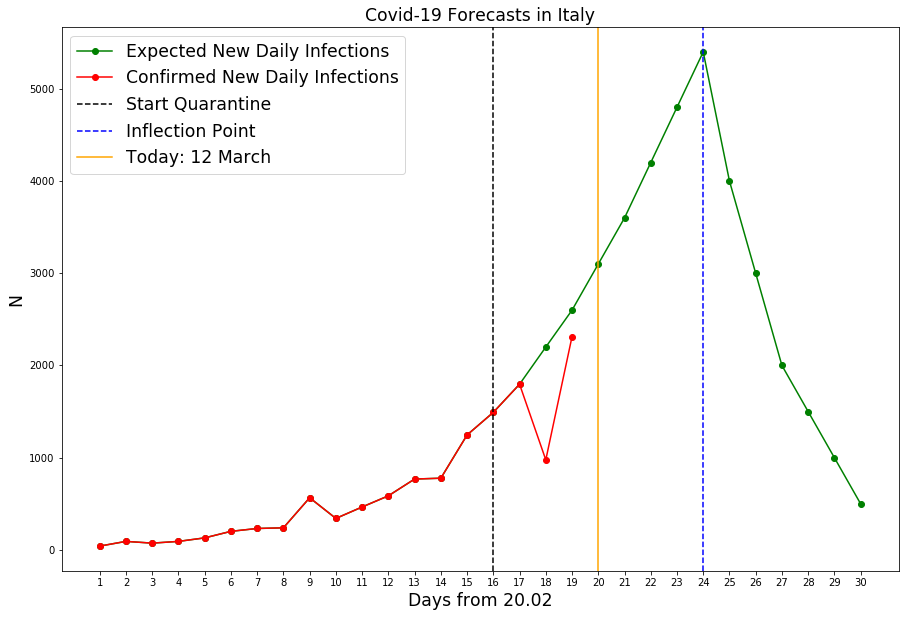

In [27]:
x_prev_It = np.arange(1,len(prev_It))
x_It = np.arange(1,len(cases_It))

figure(figsize=(15, 10))
plt.title('Covid-19 Forecasts in Italy', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xticks(x_prev_It)
plt.plot(x_prev_It,growth_prev_It,color='green',marker='o',label='Expected New Daily Infections')
plt.plot(x_It, growth_It,color='red',marker='o',label='Confirmed New Daily Infections')
plt.axvline(x = 16, color='black',linestyle='dashed',label='Start Quarantine')
plt.axvline(x = 24, color='blue',linestyle='dashed',label='Inflection Point')
plt.axvline(x = 20, color='orange',label='Today: 12 March')
plt.legend(loc='upper left', fontsize='xx-large')
plt.show()